### Importación de Bibliotecas

```python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Función de Gráfico de Matriz de Covarianza

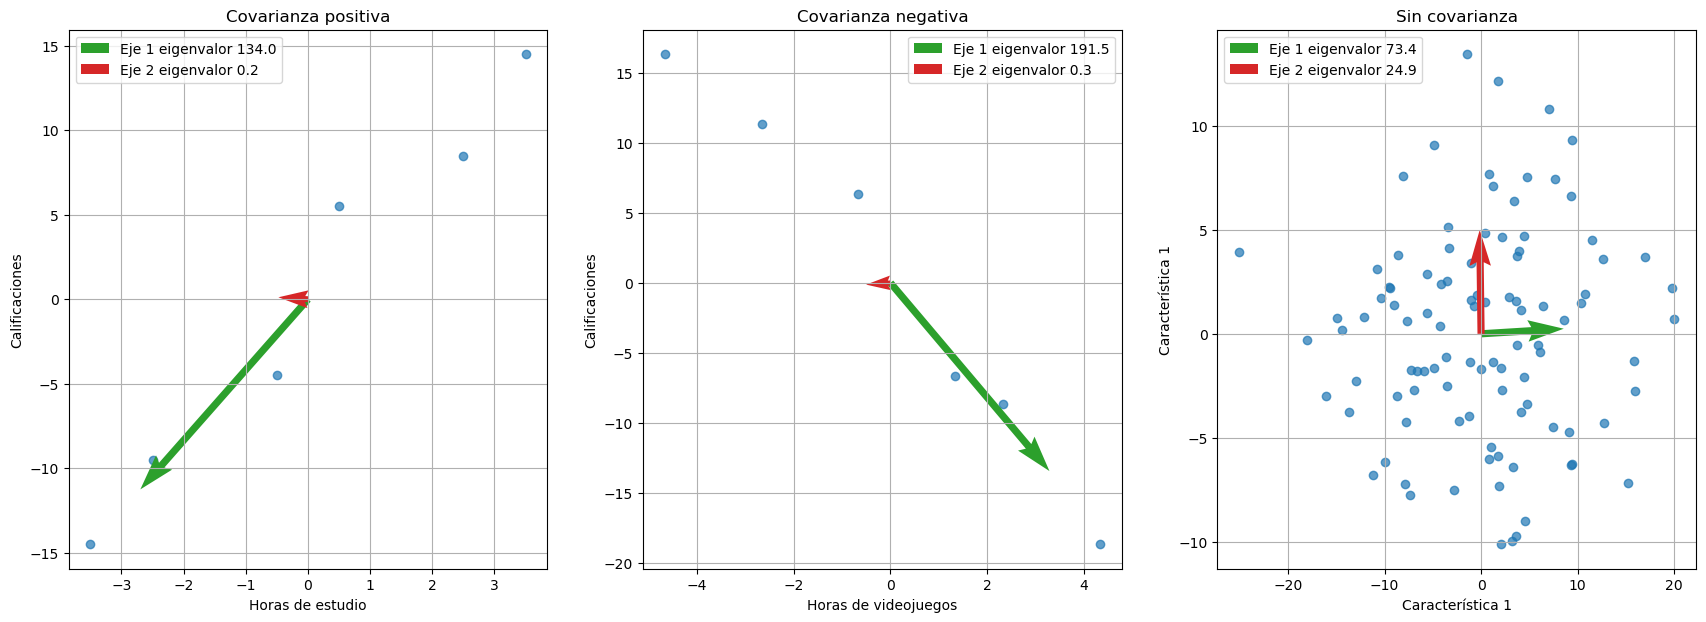

Covarianza positiva:
 [[  7.5  30.3]
 [ 30.3 126.7]]
Covarianza negativa:
 [[ 11.06666667 -44.13333333]
 [-44.13333333 180.66666667]]
Covarianza cero:
 [[73.32723151  1.38231034]
 [ 1.38231034 24.94296043]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def analizar_graficar(ax, datos, titulo, feature_names):
  matriz_cov = np.cov(datos, rowvar=False)
  eigenvalores, eigenvectores = np.linalg.eig(matriz_cov)

  idx = np.argsort(eigenvalores)[::-1]
  eigenvalores = eigenvalores[idx]
  eigenvectores = eigenvectores[:, idx]

  datos_centrados = datos - np.mean(datos, axis=0)
  ax.scatter(datos_centrados[:, 0], datos_centrados[:, 1], alpha=0.7)

  for i in range(len(eigenvalores)):
    eigen_vector = eigenvectores[:, i]
    longitud = np.sqrt(eigenvalores[i])
    ax.quiver(0, 0, eigen_vector[0] * longitud, eigen_vector[1] * longitud, angles='xy', scale_units='xy', scale=1,
              color=f'C{i+2}', width=0.015, label=f'Eje {i+1} eigenvalor {eigenvalores[i]:.1f}')
  ax.set_title(titulo)
  ax.set_xlabel(f"{feature_names[0]}")
  ax.set_ylabel(f"{feature_names[1]}")
  ax.grid(True)
  ax.legend()

  return matriz_cov

datos_pos = np.array([
    [2, 65],
    [3, 70],
    [5, 75],
    [6, 85],
    [8, 88],
    [9, 94],

])

datos_neg = np.array([
    [10, 60],
    [8, 70],
    [7, 72],
    [5, 85],
    [3, 90],
    [1, 95],
])

np.random.seed(42)
datos_cero = np.random.randn(100, 2) * np.array([10.0, 5.0])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

cov_pos = analizar_graficar(ax1, datos_pos, "Covarianza positiva", ["Horas de estudio", "Calificaciones"])
cov_neg = analizar_graficar(ax2, datos_neg, "Covarianza negativa", ["Horas de videojuegos", "Calificaciones"])
cov_cero = analizar_graficar(ax3, datos_cero, "Sin covarianza", ["Característica 1", "Característica 1"])

plt.show()

print("Covarianza positiva:\n", cov_pos)
print("Covarianza negativa:\n", cov_neg)
print("Covarianza cero:\n", cov_cero)
